In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
from matplotlib import pyplot as plt

In [47]:
def add_address_of_data(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/testGrouped.csv"])

def add_address_of_reduced_url(given_address): # could be useful for easily allowing others to use this file
    return "".join([given_address, "/references/url_references_reduced.csv"])

# ------ operations -------
def load_time_spent_to_list(size, url_infos, time_infos):
    temp = [[] * 1 for i in range(size+1)] # 2D list, changeable and allows same values

    for x in range(len(time_infos)):
        time_info = time_infos[x]
        current_URL_list = url_infos[x]
        for y in range(len(time_info)):
            temp[current_URL_list[y]].append(time_info[y])

    return temp

def get_average_list(given_lists):
    avg_time_spent_list = []
    for given_list in given_lists:
        if len(given_list) == 0:
            avg_time_spent_list.append(0)
        else:
            avg_value = int(sum(given_list) / len(given_list)) # would it be better to keep this as float?
            avg_time_spent_list.append(avg_value)

    return avg_time_spent_list

def get_var_list(given_lists):
    avg_time_spent_list = []
    for given_list in given_lists:
        if len(given_list) == 0: # to avoid division by 0 error
            avg_time_spent_list.append(0)
        else:
            avg_value = np.var(given_list) # would it be better to keep this as float?
            avg_time_spent_list.append(avg_value)

    return avg_time_spent_list

# this will allow us to get top N of any list with it's urls too (assuming index represents the id of page)
def get_top_N(elements, size):
    temp = elements.copy() # to disallow changes of temp to affect the orginial one
    temp = [int(x) for x in temp]
    highest_values = []
    saved_indexes = []
    saved_urls = []

    for k in range(size): # getting top N (size) values
        biggest_val = 0
        for l in range(len(temp)): # find current biggest value
            if temp[l] > biggest_val:
                biggest_val = temp[l]

        highest_values.append(biggest_val)
        current_index = temp.index(biggest_val) # returns the first occurrence, so no problem

        saved_indexes.append(current_index)
        saved_urls.append(url_references.urls[current_index]) # url_references.urls[id_of_min]
        temp.remove(biggest_val)

    return highest_values, saved_urls, saved_indexes

# this will allow us to get least N of any list with it's urls too (assuming index represents the id of page)
def get_least_N(elements, size):
    temp = elements.copy() # to disallow changes of temp to affect the orginial one
    temp = [int(x) for x in temp]
    lowest_values = []
    saved_indexes = []
    saved_urls = []

    for k in range(size): # getting top N (size) values
        lowest_val = float("inf")
        for l in range(len(temp)): # find current biggest value
            if temp[l] < lowest_val and temp[l] != 0:
                lowest_val = temp[l]

        lowest_values.append(lowest_val)
        current_index = temp.index(lowest_val) # returns the first occurrence, so no problem

        saved_indexes.append(current_index)
        saved_urls.append(url_references.urls[current_index]) # url_references.urls[id_of_min]
        temp.remove(lowest_val)

    return lowest_values, saved_urls, saved_indexes

def get_url(id):
    return url_references.loc[url_references['id'] == id]['urls'].tolist()

In [3]:
my_address = "C:/Users/dnaen/APG_data" # only this has to be modified
conv = {"url_id_path": literal_eval, "seconds_spent_path": literal_eval}
df = pd.read_csv(add_address_of_data(my_address), converters = conv)
url_references = pd.read_csv(add_address_of_reduced_url(my_address))

In [6]:
# keep this cell separate because it takes time
info_list = load_time_spent_to_list(len(url_references['id']), df["url_id_path"], df["seconds_spent_path"])

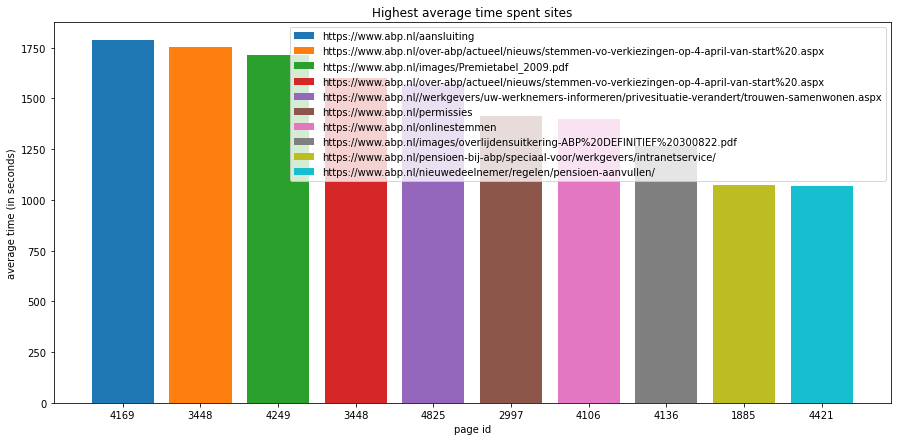

In [38]:
# this part is for finding out the top N the highest averages

# deciding how much far we want to go
size = 20

avg_list = get_average_list(info_list)
[sorted_avg_list, urls_of_sorted_avg, indexes_of_sorted_avg] = get_top_N(avg_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_avg))
plt.xticks(xs, indexes_of_sorted_avg)

for i, x in enumerate(xs):
    plt.bar(i, sorted_avg_list[x])

labels = urls_of_sorted_avg
plt.title('Highest average time spent sites')
plt.xlabel('page id')
plt.ylabel('average time (in seconds)')
plt.legend(labels)

plt.savefig('top_20_avg_time_spent_sites.pdf')

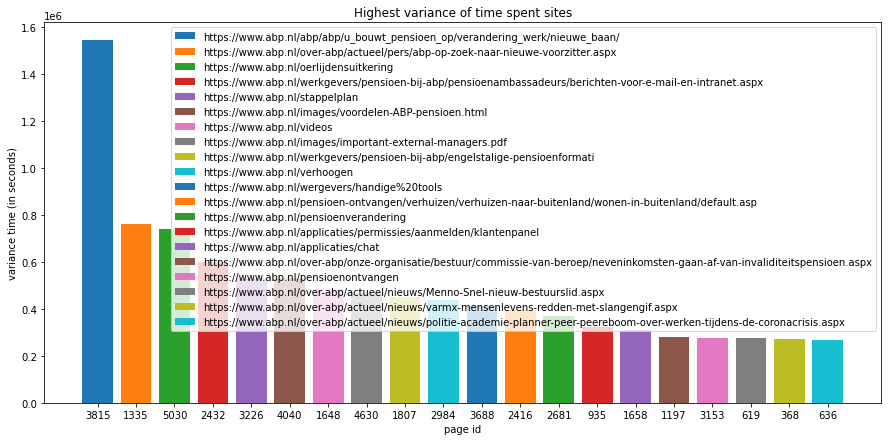

In [48]:
# this part is for finding out the top N the highest variances

# deciding how much far we want to go
size = 20

avg_list = get_var_list(info_list)
[sorted_avg_list, urls_of_sorted_avg, indexes_of_sorted_avg] = get_top_N(avg_list, size)

fig = plt.subplots(figsize = (15,7))

 # plt.bar(indexes_of_sorted_avg[-size:], sorted_avg_list[-size:])

xs = np.arange(len(indexes_of_sorted_avg))
plt.xticks(xs, indexes_of_sorted_avg)

for i, x in enumerate(xs):
    plt.bar(i, sorted_avg_list[x])

labels = urls_of_sorted_avg
plt.title('Highest variance of time spent sites')
plt.xlabel('page id')
plt.ylabel('variance time (in seconds)')
plt.legend(labels)

plt.savefig('top_20_variance_time_spent_sites.pdf')